In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

In [4]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

In [7]:
pd.DataFrame(housing.data, columns=housing.feature_names).head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [8]:
X = housing['data']
y = housing['target']

In [17]:
pd.DataFrame(X).head()

,0,1,2,3,4,5,6,7
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_OTHER, y_train, y_OTHER = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
X_val, X_test, y_val, y_test = train_test_split(X_OTHER, y_OTHER,test_size=0.5, random_state=42)

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [23]:
pd.DataFrame(X_train).head()

,0,1,2,3,4,5,6,7
0,-0.326196,0.348490,-0.174916,-0.208365,0.768276,0.051376,-1.372811,1.272587
1,-0.035843,1.618118,-0.402835,-0.128530,-0.098901,-0.117362,-0.876696,0.709162
2,0.144701,-1.952710,0.088216,-0.257538,-0.449818,-0.032280,-0.460146,-0.447603
3,-1.017864,0.586545,-0.600015,-0.145156,-0.007434,0.077507,-1.382172,1.232698
4,-0.171488,1.142008,0.349007,0.086624,-0.485877,-0.068832,0.532084,-0.108551


In [25]:
X_train.shape[1:]

(8,)

In [44]:
model = keras.models.Sequential([
    keras.layers.Input(shape=X_train.shape[1:], name = 'Input_layer'),
    keras.layers.Dense(60, activation='relu', name = 'Hidden_layer_1'),
    keras.layers.Dense(30, activation='relu', name = 'Hidden_layer_2'),
    keras.layers.Dense(1, activation='linear', name = 'Output_layer')
])

In [45]:
from keras.optimizers import Adam

In [46]:
model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=1e-3), metrics=['RootMeanSquaredError'])

In [47]:
history = model.fit(X_train, y_train, epochs=20,batch_size=64, validation_data=(X_val, y_val))

Epoch 1/20
258/258 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - RootMeanSquaredError: 1.6201 - loss: 2.7910 - val_RootMeanSquaredError: 0.7527 - val_loss: 0.5665
Epoch 2/20
258/258 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.7153 - loss: 0.5119 - val_RootMeanSquaredError: 0.6702 - val_loss: 0.4492
Epoch 3/20
258/258 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.6429 - loss: 0.4133 - val_RootMeanSquaredError: 0.6412 - val_loss: 0.4111
Epoch 4/20
258/258 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.6186 - loss: 0.3828 - val_RootMeanSquaredError: 0.6263 - val_loss: 0.3922
Epoch 5/20
258/258 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.6038 - loss: 0.3646 - val_RootMeanSquaredError: 0.6155 - val_loss: 0.3788
Epoch 6/20
258/258 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.5947 - loss: 0.3537 - val_RootMeanSquaredError: 0.6076 - val_loss: 0.3692
Epoch 7/20
258/258 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.5840 - los

In [48]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Hidden_layer_1 (Dense)          │ (None, 60)             │           540 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden_layer_2 (Dense)          │ (None, 30)             │         1,830 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_layer (Dense)            │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,205 (28.15 KB)

 Trainable params: 2,401 (9.38 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,804 (18.77 KB)

In [49]:
loss, rmse = model.evaluate(X_test, y_test)

65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - RootMeanSquaredError: 0.5409 - loss: 0.2929


In [50]:
print(f'Loss {loss}')
print(f'RMSE {rmse}')

Loss 0.29734885692596436
RMSE 0.5452970266342163


In [51]:
y_pred = model.predict(X_test)

65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  


In [52]:
print(f'Actual value {y_test[:5]}')
print(f'Predicted value {y_pred[0:5].flatten()}')

Actual value [2.385 3.297 0.952 2.451 0.641]
Predicted value [3.0379581 2.080988  1.8876384 2.4501472 1.1019503]


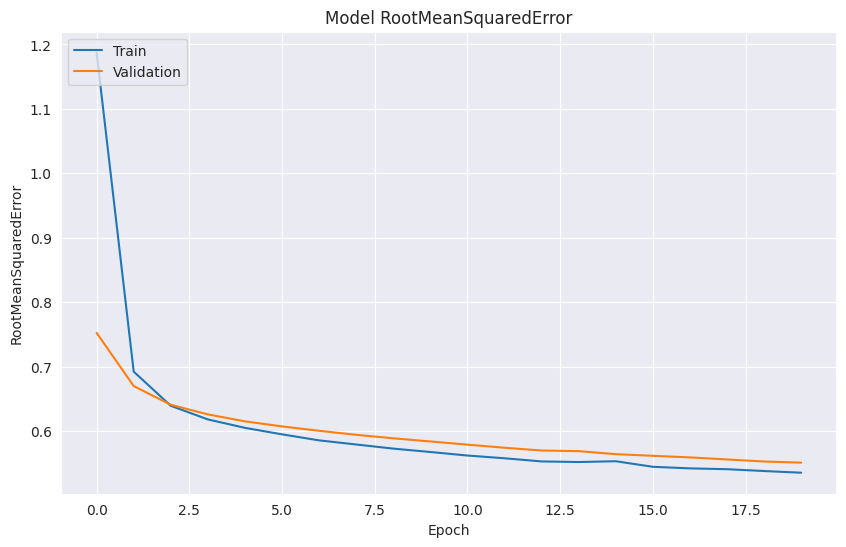

In [53]:
plt.figure(figsize=(10,6))
plt.plot(history.history['RootMeanSquaredError'])
plt.plot(history.history['val_RootMeanSquaredError'])
plt.title('Model RootMeanSquaredError')
plt.ylabel('RootMeanSquaredError')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()